# Data Processing

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
import plotly.express as px

In [2]:
data = pd.read_csv('C:\Final_project\Final_project\data\winequality-red.csv')

In [3]:
df = data.copy()

In [4]:
df = data.replace({'quality' : {
                                    8 : 'Quality',
                                    7 : 'Quality',
                                    6 : 'Quality',
                                    5 : 'Non-Quality',
                                    4 : 'Non-Quality',
                                    3 : 'Non-Quality',
        }}
)

In [5]:
df.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,Non-Quality
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,Non-Quality
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,Non-Quality
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,Quality
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,Non-Quality


In [6]:
unique_values = df['quality'].unique()
unique_values 

array(['Non-Quality', 'Quality'], dtype=object)

In [7]:
value_counts = df['quality'].value_counts()
value_counts

quality
Quality        855
Non-Quality    744
Name: count, dtype: int64

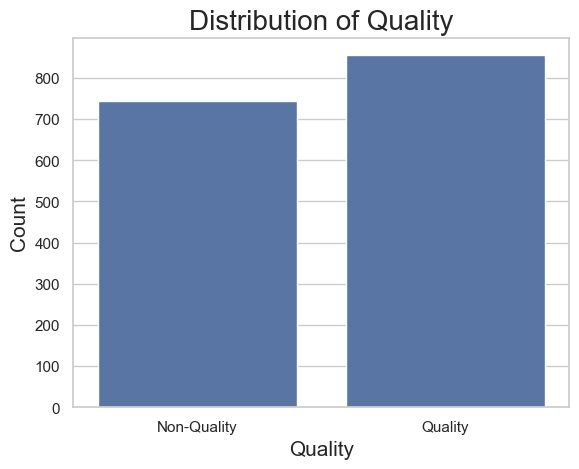

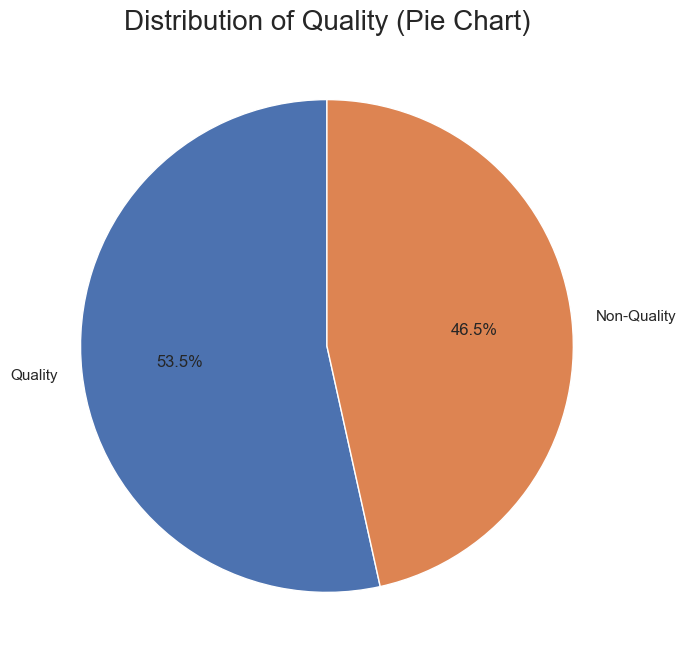

In [22]:
sns.countplot(x='quality', data=df, order=unique_values)
plt.xlabel('Quality', fontsize=15)
plt.ylabel('Count', fontsize=15)
plt.title('Distribution of Quality', fontsize=20)
plt.show()
plt.figure(figsize=(8, 8))
quality_counts = df['quality'].value_counts()
plt.pie(quality_counts, labels=quality_counts.index, autopct='%1.1f%%', startangle=90)
plt.title('Distribution of Quality (Pie Chart)', fontsize=20)
plt.show()

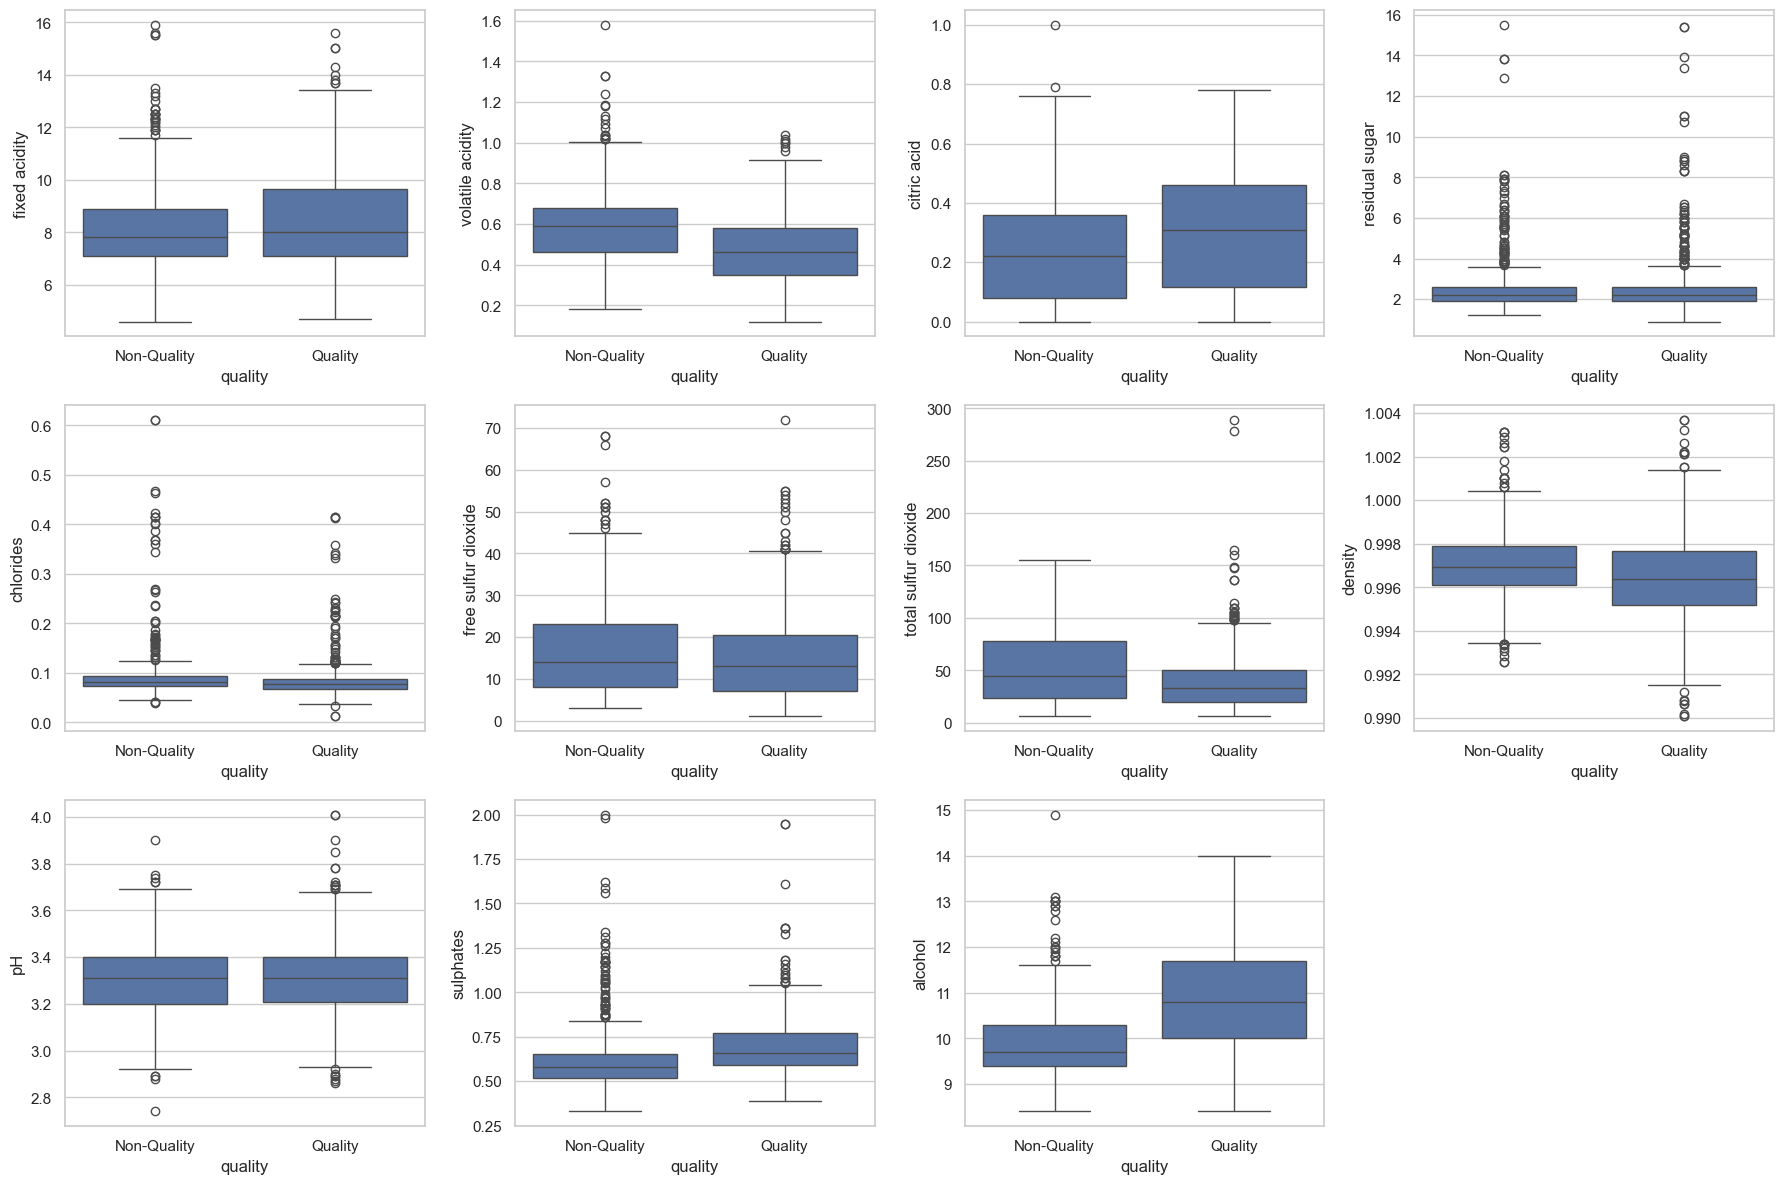

In [9]:
plt.figure(figsize=(18, 12))
sns.set(style="whitegrid")

for i, feature in enumerate(df.columns[:-1]):
    plt.subplot(3, 4, i+1)
    sns.boxplot(x='quality', y=feature, data=df)
plt.tight_layout()
plt.show()

Veri setimizde boş değer gözükmüyordu.

## Aykırı Değer Analizi
Aykırı değerler diğer bir deyişle uç değerler. Modelin performansını etkilememesi için aykırı değerlerin kaynağını bulmamız gerekir. Aykırı değerleri tespit edilecek değişken sayısına göre kullanacağımız yöntem değişir. 

Aykırı değişken olduğuna şüphelendiğimiz tüm değişkenlere (residual sugar, cholorides, citric asid, total sülfür dioxide) tek değişkenli aykırı değer analizi uygulayabiliriz fakat burada "bir kategorik bir sayısal aykırı değer analizi" uygulamamız daha doğru olacaktır. Yine de örnek olması açısından hem kutu grafik oluşturarak hemde z skoru analizi yaparak tek değişkenli aykırı değer analizi yapalım.

# Kutu grafik yardımıyla izlenen aykırı değerler.

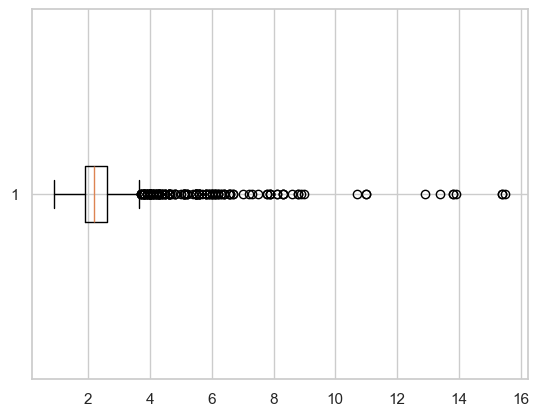

In [10]:
ig = plt.boxplot(df['residual sugar'].dropna(),vert=False)

# Z skoru ile tek değişkenli aykırı değer analizi yapabiliriz.

In [11]:
from scipy.stats import zscore
import numpy as np

In [12]:
z_scores = np.abs((df['residual sugar'] - df['residual sugar'].mean()) / df['residual sugar'].std())
aykiri_esik_degeri = 3
aykiri_degerler = data['residual sugar'][(z_scores > aykiri_esik_degeri)].sort_values
print("Aykırı Değerler:")
print(aykiri_degerler)

Aykırı Değerler:
<bound method Series.sort_values of 33      10.7
163      7.3
164      7.2
274      7.0
324     11.0
325     11.0
396      7.9
400      7.9
480     15.5
494      8.3
595      7.9
649      8.6
652      7.5
911      9.0
917      8.8
923      8.8
1043     8.9
1071     8.1
1074     8.1
1079     8.3
1081     8.3
1186     7.8
1235    12.9
1244    13.4
1434    15.4
1435    15.4
1474    13.8
1476    13.8
1574    13.9
1589     7.8
Name: residual sugar, dtype: float64>


Grubbs Testi:
Veri setindeki en büyük veya en küçük değerler arasındaki farkın, standart sapma ölçüsüne göre anormal olup olmadığını kontrol eder. Bu, tek bir aykırı değeri tespit etmeyi amaçlar.

In [13]:
from scipy import stats
def grubbs_test(veri):
    mean = np.mean(veri)
    std_dev = np.std(veri)
    n = len(veri)
    g_calculated = max(abs(veri - mean)) / std_dev
    critical_value = stats.t.ppf(1 - 0.05 / (2 * n), n - 2)
    if g_calculated > critical_value:
        return "Outlier detected"
    else:
        return "No outliers"

# Tüm kolonlar için Grubbs Testi uygula
for column in df.columns[:-1]:
    result = grubbs_test(df[column])
    print(f"Grubbs Testi sonucu for {column}: {result}")

Grubbs Testi sonucu for fixed acidity: Outlier detected
Grubbs Testi sonucu for volatile acidity: Outlier detected
Grubbs Testi sonucu for citric acid: No outliers
Grubbs Testi sonucu for residual sugar: Outlier detected
Grubbs Testi sonucu for chlorides: Outlier detected
Grubbs Testi sonucu for free sulfur dioxide: Outlier detected
Grubbs Testi sonucu for total sulfur dioxide: Outlier detected
Grubbs Testi sonucu for density: No outliers
Grubbs Testi sonucu for pH: Outlier detected
Grubbs Testi sonucu for sulphates: Outlier detected
Grubbs Testi sonucu for alcohol: Outlier detected


Citric acid ve pH da aykırı değer olmadığı gözleniyor.

# Hem Kategorik hem de numerik değişkenler için aykırı değer analizi
Model oluştururken aykırı değerler için yapılacak en iyi yöntem ya bir şey uygulamamak yada aykırı değerleri alt sınır yada üst sınırla yer değiştirmek ancak bunu değişkenin normalize durumunu etkiliyor mu etkilemiyor mu diye test etmeliyiz.
Bütün featureslara bu yöntemi uyguladıktan sonra grafikleriyle test ederek bu yöntemin o feature için iyi mi değil mi olduğunu test ettim. 
##Sonuçlar: https://github.com/BusraSarikaya1/Final_project/blob/main/trials.ipynb ##(Bunları bu şekilde ayrı dosyada göstermemin nedeni çeyekler açıklığı metodu uygulanmadan önceki haliyle uygulandıktan sonraki hallerini harşılaştırmak.)
Hangi features ta iyileşme varsa onun üzerinde uyguladım. Grafiklere bakınca en iyi iyileşme chlorides daydi
Bu yöntem residual sugar a uygulandı. Ancak normal dağılımlı grafiğin yapısını bozduğu gözlendi. O yüzden analiz yaparken uygulamadım.
- *fixed acidity de log dönüşümünü uygulayabiliriz. Log dönüşüm uygulandı ama grafiğin sağa çarpıklığında herhangi bir değişim olmadı.
- volatile acidity grafiğinde de çok bir değişikliğe yol açmıyor.
- citric acid de aykırı değer yok.
- residual sugar için uyguladığımızda grafiğin normal dağılımının bozulduğunu kesikli bir hal aldığını gördük. 
- chlorides grafiğini daha normal bir hale getirdiği için iyi bir yöntemdir.
- *free sulfür dioxide sağa çarpık. Log dönüşüm uygulandı ancak grafik çift tepeli hale geldi normalizasyonu bozuldu o yüzden bu değişkendeki aykırı değerlere de dokunulmadı.
- *total sulfür dioxide log dönüşümü uygulandı sağa çarpık olan grafik normal dağılıma daha uygun hale geldi. Ancak kutu grafiği incelediğimizde aykırı değerlerin çok fazla kümelenmemiş olmaması ve logaritmik dönüşüm yapıldığında veriler oransal olarak tamamen değişeceği için buda model açısından uygun olamayacağından için herhangi bir dönüşüm uygulamadım.
- density için aykırı değer bulunamamıştı.
- pH normal dağılıma gayet uygun olduğu için ve aykırı değerler arasında kümelenme olmadığı için dokunmadık.
- sulphates sağa çarpık. Ancak zaten 0 ve negatif değerler içeren veri setleri için uygun değil.
- *alcohol sağa çarpık. Alkol ve kalite arasındaki ilişki büyük olduğundan onu ele almıyorum.

En son aşamada modelleme yapıcağımız için aykırı değerler üzerinde yapılabilecek iki seçeneğimiz oluyor:
- aykırı değerleri kaldırmalıyız.
- her değişken için çeyrekler arası aralığı (IQR) kullanarak aykırı değerleri tespit etmeyi ve ardından belirlenen kurala göre bu aykırı değerleri düzeltmeyi içerir.

"chlorides" sütunundaki aykırı değerler, Tukey's Method (çeyrekler açıklığı) kullanılarak tespit ediliyor ve yukarıdaki sınıra (upper_cap) çekiliyor. Yani, bu aykırı değerler, üst sınırdan büyük olan değerlere sahip olan gözlemler, bu sınıra çekilerek değiştiriliyor.

In [14]:
Q1 = df['chlorides'].quantile(0.25)
Q3 = df['chlorides'].quantile(0.75)
IQR = Q3 - Q1
low_cap = Q1 - 1.5 * IQR
upper_cap = Q3 + 1.5 * IQR
upper_outliers = (df['chlorides'] > upper_cap)
mean = df['chlorides'].mean()
median = df['chlorides'].median()
df['chlorides'][upper_outliers] = median
df['chlorides'] = df['chlorides']

<Axes: xlabel='chlorides', ylabel='quality'>

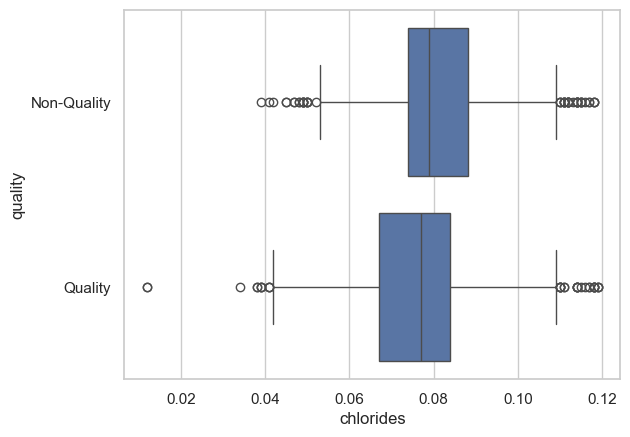

In [15]:
sns.boxplot(x=df['chlorides'],y=df['quality'])

Çeyrekler açıklığı uygulanmamış haliyle karşılaştırma yapmak için: ## https://github.com/BusraSarikaya1/Final_project/blob/main/chlorides.ipynb ## bakılabilir.

In [16]:
df.duplicated().sum()

240

In [17]:
duplicate_rows = df[df.duplicated()]

In [18]:
duplicate_rows

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
4,7.4,0.700,0.00,1.90,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,Non-Quality
11,7.5,0.500,0.36,6.10,0.071,17.0,102.0,0.99780,3.35,0.80,10.5,Non-Quality
27,7.9,0.430,0.21,1.60,0.106,10.0,37.0,0.99660,3.17,0.91,9.5,Non-Quality
40,7.3,0.450,0.36,5.90,0.074,12.0,87.0,0.99780,3.33,0.83,10.5,Non-Quality
65,7.2,0.725,0.05,4.65,0.086,4.0,11.0,0.99620,3.41,0.39,10.9,Non-Quality
...,...,...,...,...,...,...,...,...,...,...,...,...
1563,7.2,0.695,0.13,2.00,0.076,12.0,20.0,0.99546,3.29,0.54,10.1,Non-Quality
1564,7.2,0.695,0.13,2.00,0.076,12.0,20.0,0.99546,3.29,0.54,10.1,Non-Quality
1567,7.2,0.695,0.13,2.00,0.076,12.0,20.0,0.99546,3.29,0.54,10.1,Non-Quality
1581,6.2,0.560,0.09,1.70,0.053,24.0,32.0,0.99402,3.54,0.60,11.3,Non-Quality


In [19]:
df_cleaned = df.drop_duplicates()

In [20]:
df_cleaned

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,Non-Quality
1,7.8,0.880,0.00,2.6,0.098,25.0,67.0,0.99680,3.20,0.68,9.8,Non-Quality
2,7.8,0.760,0.04,2.3,0.092,15.0,54.0,0.99700,3.26,0.65,9.8,Non-Quality
3,11.2,0.280,0.56,1.9,0.075,17.0,60.0,0.99800,3.16,0.58,9.8,Quality
5,7.4,0.660,0.00,1.8,0.075,13.0,40.0,0.99780,3.51,0.56,9.4,Non-Quality
...,...,...,...,...,...,...,...,...,...,...,...,...
1593,6.8,0.620,0.08,1.9,0.068,28.0,38.0,0.99651,3.42,0.82,9.5,Quality
1594,6.2,0.600,0.08,2.0,0.090,32.0,44.0,0.99490,3.45,0.58,10.5,Non-Quality
1595,5.9,0.550,0.10,2.2,0.062,39.0,51.0,0.99512,3.52,0.76,11.2,Quality
1597,5.9,0.645,0.12,2.0,0.075,32.0,44.0,0.99547,3.57,0.71,10.2,Non-Quality


# Duplicate eden veriler kaldırıldı.

In [21]:
df_cleaned.to_csv('cleaned_data.csv')